In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Prepare Data

In [74]:
df = pd.read_csv("/kaggle/input/adni1-final/Gene_Data_Adni_1.csv")

In [75]:
df = pd.read_csv("/kaggle/input/adni1-final/Gene_Data_Adni_1.csv").drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.2","Unnamed: 0.3","ID"], axis=1)

In [76]:
df['label'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['label'])

# Encode categorical data 

In [77]:
#CN 1, AD 0, MCI 2
#M 1, F 0
label_encoder = LabelEncoder()
df["label"]= label_encoder.fit_transform(df["label"])
df["gender"]= label_encoder.fit_transform(df["gender"])

In [78]:
features = df.drop('label',axis=1)
label= df.label

In [79]:
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,stratify=label,random_state = 42)

# Class weights 

In [80]:
# class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
#                                                  classes = np.unique(y_train),
#                                                  y = y_train)
# print(class_weights)
#class_weights_dict = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}

class_weights_dict = {0: 2, 1: 2, 2: 1}
print(class_weights_dict)

#class_weights_1 = class_weight.compute_sample_weight(class_weight = 'balanced' , y = np.array(y_train))
#print(class_weights_1)

sample_weights = [class_weights_dict[label] for label in y_train]
print(sample_weights)


{0: 2, 1: 2, 2: 1}
[2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,

# SVM poly classifier 

In [81]:
svm_classfier = SVC(kernel = "poly",probability= True,random_state = 42, class_weight = class_weights_dict)

In [82]:
svm_classfier.fit(x_train, y_train)

SVC(class_weight={0: 2, 1: 2, 2: 1}, kernel='poly', probability=True,
    random_state=42)

In [83]:
svm_predict = svm_classfier.predict(x_test)

# Random Forest 

In [84]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = class_weights_dict)

In [85]:
RF.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 2, 1: 2, 2: 1}, random_state=42)

In [86]:
RF_predict = RF.predict(x_test)

# XGBOOST 

In [87]:
xb = xgb.XGBClassifier(random_state=42)

In [88]:
xb.fit(x_train, y_train,sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [89]:
XGB_predict = xb.predict(x_test)

# compare predictions 

In [90]:
print(np.array(y_test))
print("SVM PREDICT:", svm_predict)


print("RF PREDICT:", RF_predict)


print("XGB PREDICT:", XGB_predict)

[1 2 0 2 1 1 2 0 2 1 2 0 1 0 1 2 2 1 1 1 1 2 0 0 1 2 0 1 2 1 0 1 1 1 0 1 2
 0 0 2 0 2 0 0 2 1 1 0 1 0 0 1 1 2 0 1 0 1 1 1 1 0 0 0 2 0 2 2 1 1 1 1 0 2
 1 0 2 1 1 2 1 0 1 1 2 0 1 1 2 1 2 2 0 1 1 0 1 0 1 2 0 1 1 1 1 2 1 1 0 1 1
 1 1 0 1 2 0 2 2 0 2 1 1 0 1 1 2 1 1 0 1 0 0 2 2 0 0 1 0 1 1 1 1 1 1 2 1 2
 1 1 0 1 1 1 0 2 0 1 0 1 1 0 2 1]
SVM PREDICT: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
RF PREDICT: [1 1 1 1 1 2 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 2 0 1 0 1 1 0 2 1 2 0 1 2
 0 1 2 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 2 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 2 1 0 1 1 1 1 1 0 1
 2 1 0 1 1 1 1 1 0 1 0 1 1 1 1 2 1 1 0 1 2 1 1 1 1 1 1 0 1 1 1 2 1 2 1 1 1
 1 0 0 

# 3 classifiers Voting 

In [91]:
predict_voting = []
for i in range (len(svm_predict)): 
    voting_list =[0, 0, 0]
    
    if svm_predict[i] == 0:
         voting_list[0] += 1
    elif svm_predict[i] == 1:
         voting_list[1] += 1
    elif svm_predict[i] == 2:
         voting_list[2] += 1
            
    if RF_predict[i] == 0:
         voting_list[0] += 1
    elif RF_predict[i] == 1:
         voting_list[1] += 1
    elif RF_predict[i] == 2:
         voting_list[2] += 1
            
    if XGB_predict[i] == 0:
         voting_list[0] += 1
    elif XGB_predict[i] == 1:
         voting_list[1] += 1
    elif XGB_predict[i] == 2:
         voting_list[2] += 1
            
    predict_voting.append(np.argmax(voting_list))
    

print("The predicted labels of the combined models are:",predict_voting)
print("The accuracy score of the combined models is",accuracy_score(np.array(y_test),np.array(predict_voting))*100)

The predicted labels of the combined models are: [1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2]
The accuracy score of the combined models is 53.65853658536586


# Confusion matrix 

Text(0.5, 1.0, 'Combined Models Confusion Matrix\n')

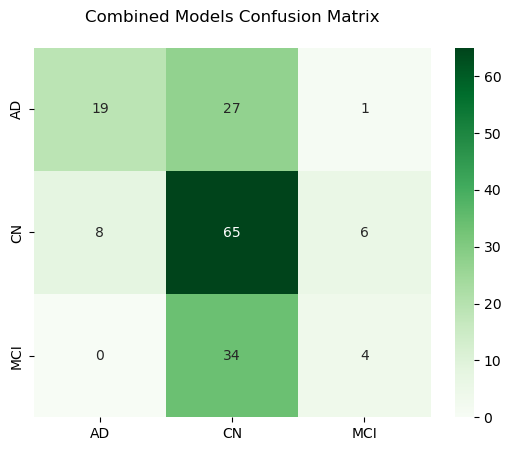

In [92]:
label_name=["AD","CN","MCI"]
ConfusionMatrix = confusion_matrix(np.array(y_test),np.array(predict_voting))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_name, yticklabels=label_name)
plt.title("Combined Models Confusion Matrix\n")

# Classification report 

In [93]:
print("Classification Report of the Combined Models\n")
print(classification_report(np.array(y_test),np.array(predict_voting), target_names=["AD","CN","MCI"]))

Classification Report of the Combined Models

              precision    recall  f1-score   support

          AD       0.70      0.40      0.51        47
          CN       0.52      0.82      0.63        79
         MCI       0.36      0.11      0.16        38

    accuracy                           0.54       164
   macro avg       0.53      0.44      0.44       164
weighted avg       0.53      0.54      0.49       164

